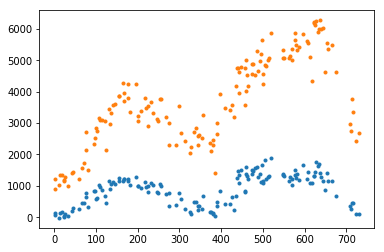

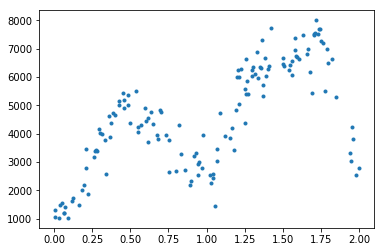


MSE against Test data:  388479.062231


In [72]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def splitInputOutput(data):
    x, y = np.array(data[:,0:4], dtype=float), np.array(data[:,4:6],dtype=int)
#    y = np.squeeze(np.asarray(y)) #y.reshape(1,len(y)).T
    return x,y

def splitTestTrain(data):
    L = int(data.shape[0]/5)
    x, y = np.array(data[0:L,:], dtype=float), np.array(data[L:,:],dtype=float)
#    y = np.squeeze(np.asarray(y)) #y.reshape(1,len(y)).T
    return x,y

df = pd.read_csv('data_randomized.csv',sep=',',names=["Day", "Temp", "Humidity", "Wind", "Casual", "Registered","Total"],skiprows=1, dtype=float);
df["Day"] = df.transform(lambda x: x/365.)

Test,Train = splitTestTrain(df.as_matrix())

X,y = splitInputOutput(Train)

#alpha is the weight supressor, gamma is used for gaussian (ie. rbf) and is ignored otherwise,
#degree is used for polynomial and is ignored otherwise
krr = KernelRidge(alpha=1,kernel='rbf', gamma=10, degree=3)

krr.fit(X,y)

X,y = splitInputOutput(Test)

result = krr.predict(X)

plt.clf()
plt.plot(X[:,0]*365,result,'.')
plt.show()

plt.clf()
plt.plot(X[:,0],result[:,0]+result[:,1],'.')
plt.show()


mse = 0.5*np.sum((y - result)**2)/result.shape[0]
print()
print("MSE against Test data: ",mse)
